In [1]:
import tensorflow as tf #library dasar deep learning
from tensorflow.keras.models import load_model #memanggil fungsi untuk load model yang telah disimpan saat training
import cv2 #Library untuk memanipulasi gambar dan video (khusus utk computer vision)
import numpy as np #Library untuk manipulasi array
from mtcnn import MTCNN #Library untuk deteksi wajah
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
model=load_model('EmotionDetectionModel.h5') #Load model yang sudah disave oleh modelcheckpoint

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-09-22 22:23:57.865046: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-22 22:23:57.865369: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              16779264  
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3

Ada 2 versi implementasi model yaitu dengan membaca gambar dan webcam realtime

## Membaca gambar

In [9]:
def emosion_detector(model,image):
    class_label=['Marah','Jijik','Takut','Bahagia','Sedih','Terkejut','Netral'] #Mendefinisikan list nama kategori emosi
    face_detector = MTCNN() #Load model pendeteksi wajah (MTCNN)

    img = plt.imread(image) #Load gambar
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Ubah gambar ke grayscale
    faces = face_detector.detect_faces(img) #Deteksi wajah-wajah yang ada di gambar

    for i in range(len(faces)):
        x, y, w, h = faces[i]['box'] #Ambil koordinat area wajah yang terdeteksi
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 6) #Buat persegi panjang yang sesuai dengan koordinat area wajah dengan warna merah (255,0,0) dan ketebalan 6 pt
        crop = cv2.resize(img[y:y+h,x:x+w],(48,48)) #Potong gambar sesuai dengan area wajah dan mengubah ukuran ke 48x48
        crop = crop/255.0 #Scaling gambar
        crop = crop.reshape(-1,48,48,3) #Ubah ukuran array gambar

        result = model.predict(crop) #Prediksi emosi wajah
        label_idx=np.where(result[0]==max(result[0]))[0][0] #Mencari indeks label yang probabilitas hasil prediksinya paling besar

        text = class_label[label_idx] #Mengambil nama kategori dengan probabilitas hasil prediksinya paling besar
        font = cv2.FONT_HERSHEY_SIMPLEX #Set font teks
        font_scale = 1 #Set ukuran font
        font_color = (0, 0, 0) #Set warna font yaitu hitam
        font_thickness = 2 #Set ketebalan font
        text_color_bg = (255,0,0) #Set warna latar belakang text

        text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness) #Mengambil ukuran teks di gambar
        text_w, text_h = text_size #Mengambil lebar dan panjang teks
        cv2.rectangle(img, (x + text_w, y - text_h-15), (x, y), text_color_bg, -1) #Membuat persegi panjang yang sesuai dengan ukuran teks
        cv2.putText(img,text,(x, y-10), font , font_scale, font_color, font_thickness) #Memasukkan teks ke gambar
    fig,ax=plt.subplots(figsize=(img.shape[0]/72,img.shape[1]/72)) #Plot gambar dengan ukuran sesuai dengan aslinya
    ax.imshow(img)
    plt.axis('off') #Hapus sumbu gambar



2021-09-22 22:31:43.820837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-22 22:31:43.875319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-22 22:31:43.931832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-22 22:31:44.152714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-22 22:31:44.270225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


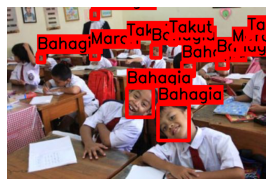

In [12]:
emosion_detector(model,'test4.jpeg')

## Membaca webcame video

In [ ]:
def webcam_emotion_detector(video=1):

    class_label=['Marah','Jijik','Takut','Bahagia','Sedih','Terkejut','Netral']
    face_detector = MTCNN()

    cam=cv2.VideoCapture(video) #Definisikan video capturing dengan set camera ke-1 (sesuaikan dengan device, default=0)
    cam.set(cv2.CAP_PROP_FPS, 500000) #Set FPS
    cam.set(3, 640) # set video width
    cam.set(4, 480) # set video height

    while True:
        _,img=cam.read() #Membaca frame video
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detect_faces(img)

        for i in range(len(faces)):
            x, y, w, h = faces[i]['box']
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 6)
            crop = cv2.resize(img[y:y+h,x:x+w],(48,48))
            crop = crop/255.0
            crop = crop.reshape(-1,48,48,3)

            result = model.predict(crop)
            label_idx=np.where(result[0]==max(result[0]))[0][0]

            text = class_label[label_idx]
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 2
            font_color = (0, 0, 0)
            font_thickness = 3
            text_color_bg = (255,0,0)

            text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
            text_w, text_h = text_size
            cv2.rectangle(img, (x + text_w, y - text_h-15), (x, y), text_color_bg, -1)
            cv2.putText(img,text,(x, y-10), font , font_scale, font_color, font_thickness)

            cv2.imshow('Facial Emotion Recognition, FPS:{}'.format(cam.get(cv2.CAP_PROP_FPS)), img) #Menampilkan video webcam
            #   Stop if q key is pressed
            if cv2.waitKey(10) & 0xFF == ord('q'): #Set berhenti jika tekan tombol huruf 'q'
                break
    return cam.release()

In [ ]:
webcam_emotion_detector()